In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('election2024.csv')
df.head()

# loading data.

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [3]:
df.shape

(1600, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [5]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [6]:
from statistics import mode
n1 = mode(df['job_type'][df['job_type'].notnull()])
n2 = mode(df['company_type'][df['company_type'].notnull()])
n1, n2

('commercial organization', 'industry, manufacturing')

In [7]:
# removed all null data.

df['job_type'] = df['job_type'].fillna(n1)
df['company_type'] = df['company_type'].fillna(n2)

In [8]:
df.sample(5)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
425,0716814cd40ce181,male,68.0,volga,village,named correct date,likely yes,Putin,over 4 hours a day,does not use internet,school,high,unemployed pensioner,commercial organization,"industry, manufacturing",1.032298
1194,0716d24e7c4ce021,female,79.0,central,city with population of 100-500k,named correct date,definitely yes,Kharitonov,less than 4 hours a day,less than 4 hours a day,bachelor degree,medium,unemployed pensioner,commercial organization,"industry, manufacturing",0.916956
187,07166b78640cead2,male,43.0,far eastern,city with population of less than 50k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,high,work for hire,hard to say,"construction, architecture",0.668894
1304,0716696a95ccef20,male,66.0,siberian,village,named correct date,definitely yes,Putin,over 4 hours a day,does not use internet,college,medium,unemployed pensioner,commercial organization,"industry, manufacturing",1.057197
1346,07166962360cedd7,female,86.0,siberian,village,named correct date,likely yes,Putin,over 4 hours a day,does not use internet,college,medium,unemployed pensioner,commercial organization,"industry, manufacturing",0.943955


In [9]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

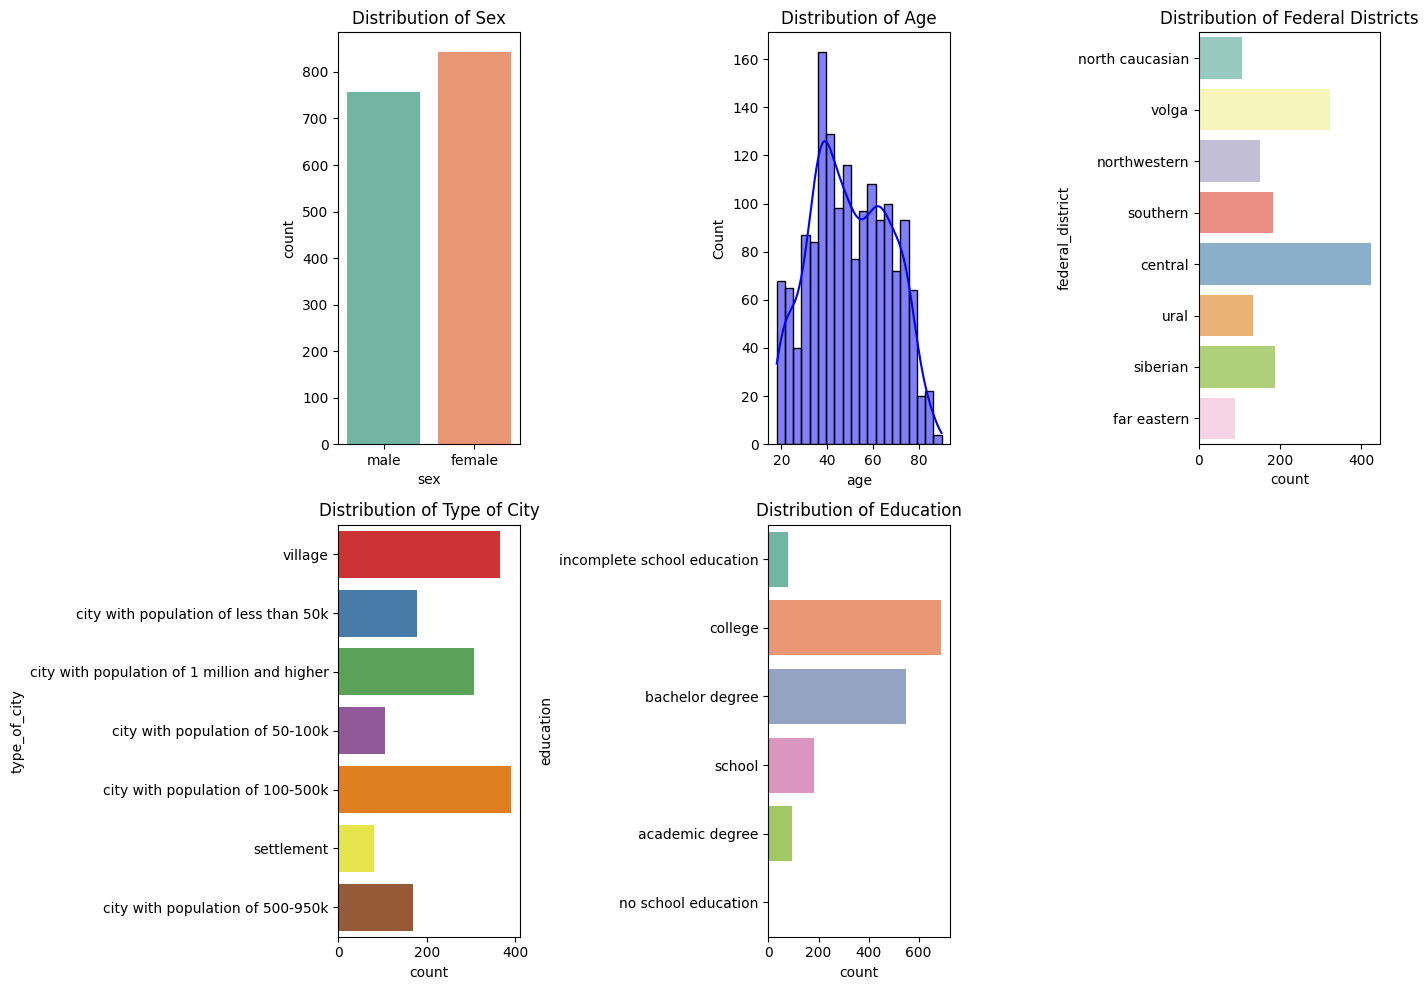

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot distribution of sex
plt.subplot(2, 3, 1)
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Distribution of Sex')

plt.subplot(2, 3, 2)
sns.histplot(df['age'], kde=True, color='blue', bins=20)
plt.title('Distribution of Age')

# Plot distribution of federal district
plt.subplot(2, 3, 3)
sns.countplot(y='federal_district', data=df, palette='Set3')
plt.title('Distribution of Federal Districts')

# Plot distribution of type of city
plt.subplot(2, 3, 4)
sns.countplot(y='type_of_city', data=df, palette='Set1')
plt.title('Distribution of Type of City')

# Plot distribution of education
plt.subplot(2, 3, 5)
sns.countplot(y='education', data=df, palette='Set2')
plt.title('Distribution of Education')

plt.tight_layout()
plt.show()

## Demographic Analysis Insights:

### Sex Distribution:
The dataset has a nearly balanced distribution of respondents by sex, with slightly more males than females.

### Age Distribution:
The age distribution is relatively normal, with most respondents falling between the ages of 30 and 60.

### Federal District Distribution:
The respondents are distributed across various federal districts, with some districts like "Volga" and "North Caucasian" having a higher representation.

### Type of City Distribution:
Respondents come from a wide range of city types, with a significant number from cities with populations of 1 million and higher.

### Education Distribution:
The dataset shows a diverse range of educational backgrounds, with a significant number holding a college degree or higher.

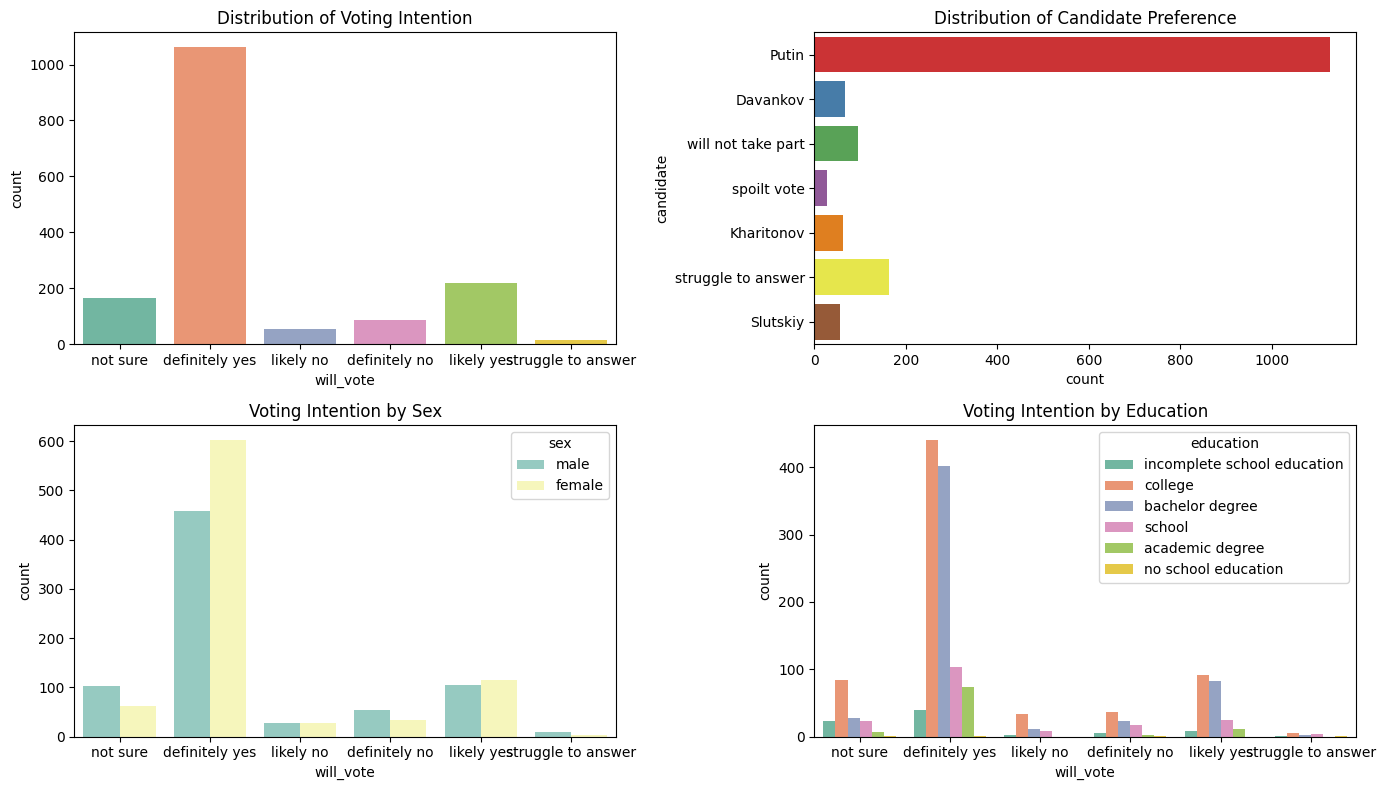

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot distribution of will_vote
plt.subplot(2, 2, 1)
sns.countplot(x='will_vote', data=df, palette='Set2')
plt.title('Distribution of Voting Intention')

# Plot distribution of candidate preference
plt.subplot(2, 2, 2)
sns.countplot(y='candidate', data=df, palette='Set1')
plt.title('Distribution of Candidate Preference')

# Relationship between will_vote and sex
plt.subplot(2, 2, 3)
sns.countplot(x='will_vote', hue='sex', data=df, palette='Set3')
plt.title('Voting Intention by Sex')

# Relationship between will_vote and education
plt.subplot(2, 2, 4)
sns.countplot(x='will_vote', hue='education', data=df, palette='Set2')
plt.title('Voting Intention by Education')

plt.tight_layout()
plt.show()


# Voting Intention Analysis Insights:

### Voting Intention Distribution:
A significant portion of respondents are "definitely yes" about voting, with a notable number still unsure.

### Candidate Preference Distribution:
The candidate "Putin" has the highest preference among respondents, followed by "Davankov". Other candidates have lower representation.

### Voting Intention by Sex:
Both males and females show similar voting intention patterns, with slight variations. A majority in both groups indicate a definite intention to vote.

### Voting Intention by Education:
Higher education levels seem to correlate with a more definite intention to vote. Respondents with college degrees or higher are more likely to say "definitely yes" to voting.

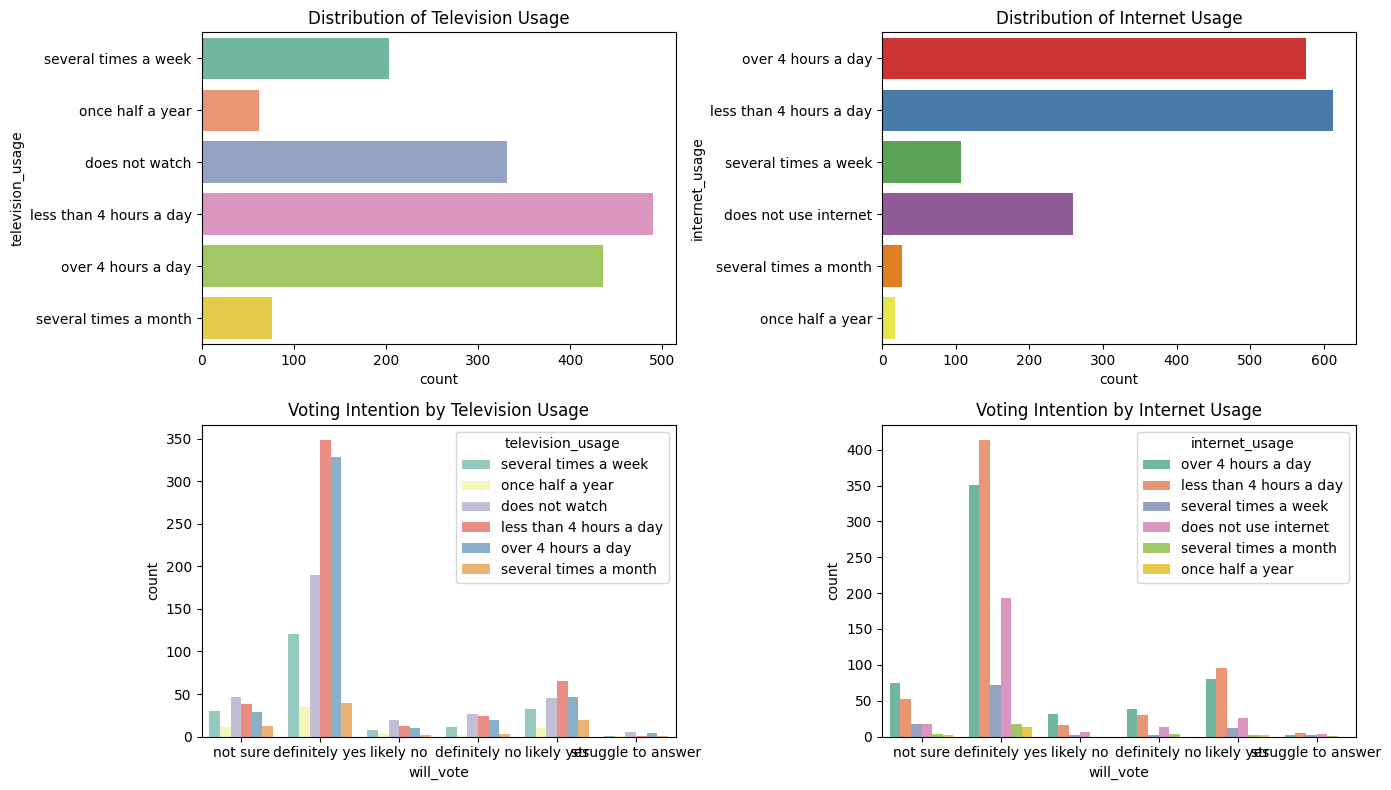

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot distribution of television usage
plt.subplot(2, 2, 1)
sns.countplot(y='television_usage', data=df, palette='Set2')
plt.title('Distribution of Television Usage')

# Plot distribution of internet usage
plt.subplot(2, 2, 2)
sns.countplot(y='internet_usage', data=df, palette='Set1')
plt.title('Distribution of Internet Usage')

# Relationship between will_vote and television usage
plt.subplot(2, 2, 3)
sns.countplot(x='will_vote', hue='television_usage', data=df, palette='Set3')
plt.title('Voting Intention by Television Usage')

# Relationship between will_vote and internet usage
plt.subplot(2, 2, 4)
sns.countplot(x='will_vote', hue='internet_usage', data=df, palette='Set2')
plt.title('Voting Intention by Internet Usage')

plt.tight_layout()
plt.show()

# Media Consumption Analysis Insights:

### Television Usage Distribution:
The respondents show varied television usage patterns, with many watching several times a week. A significant number also report rarely watching TV.

### Internet Usage Distribution:
A large proportion of respondents are heavy internet users, spending over 4 hours a day online.

### Voting Intention by Television Usage:
There is a tendency for those who watch television more frequently to have a stronger intention to vote, although the difference is not highly pronounced.

### Voting Intention by Internet Usage:
Heavy internet users show a strong intention to vote, indicating a possible correlation between internet usage and political engagement.

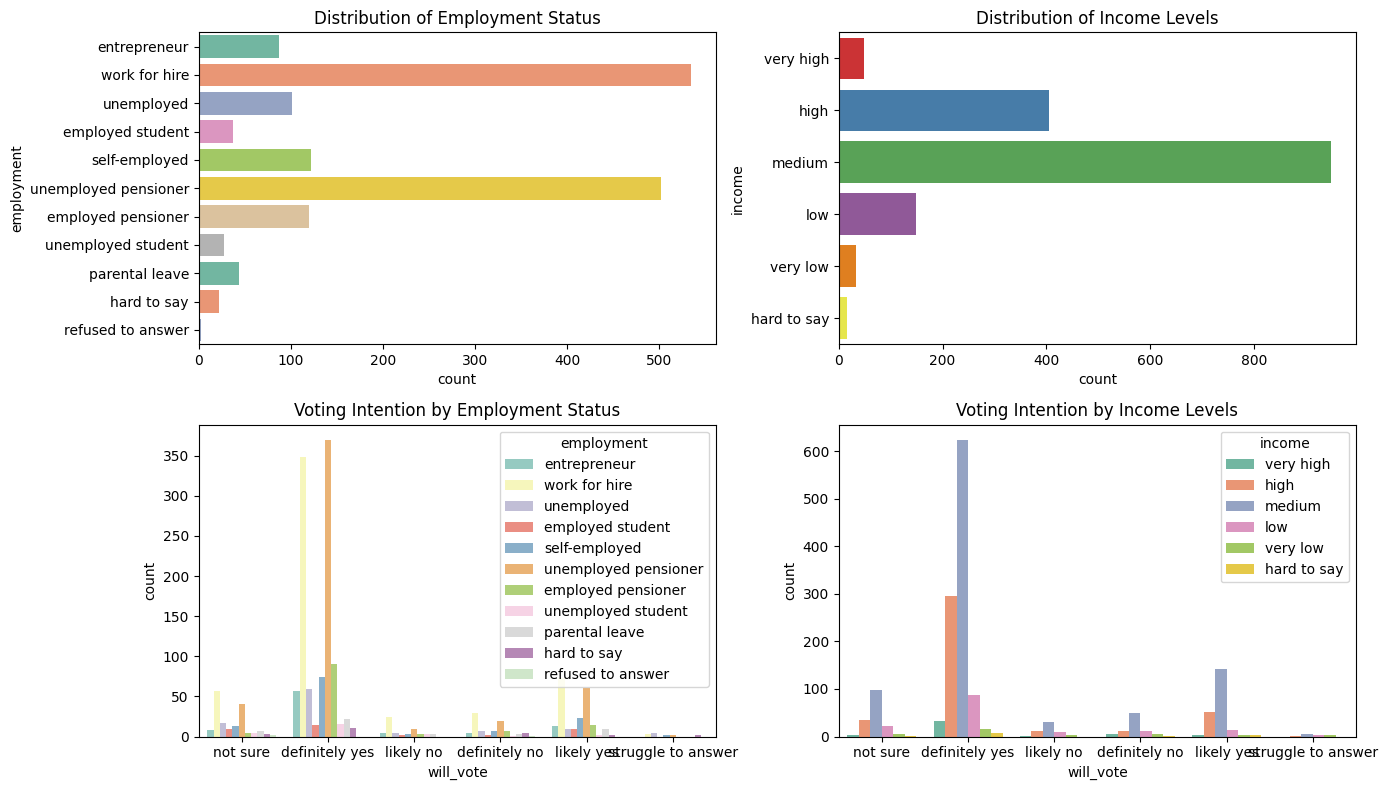

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot distribution of employment status
plt.subplot(2, 2, 1)
sns.countplot(y='employment', data=df, palette='Set2')
plt.title('Distribution of Employment Status')

# Plot distribution of income levels
plt.subplot(2, 2, 2)
sns.countplot(y='income', data=df, palette='Set1')
plt.title('Distribution of Income Levels')

# Relationship between employment status and will_vote
plt.subplot(2, 2, 3)
sns.countplot(x='will_vote', hue='employment', data=df, palette='Set3')
plt.title('Voting Intention by Employment Status')

# Relationship between income levels and will_vote
plt.subplot(2, 2, 4)
sns.countplot(x='will_vote', hue='income', data=df, palette='Set2')
plt.title('Voting Intention by Income Levels')

plt.tight_layout()
plt.show()

# Employment and Income Analysis Insights:

### Employment Status Distribution:
The respondents have a diverse range of employment statuses, with many employed, self-employed, and a notable number of unemployed individuals.

### Income Levels Distribution:
Most respondents report "very high" income levels, suggesting that the sample may include a significant number of financially well-off individuals.

### Voting Intention by Employment Status:
Employed and self-employed respondents are more likely to express a definite intention to vote, while unemployed respondents show more uncertainty.

### Voting Intention by Income Levels:
Higher income levels seem to correlate with a stronger intention to vote, particularly among those with "very high" income.

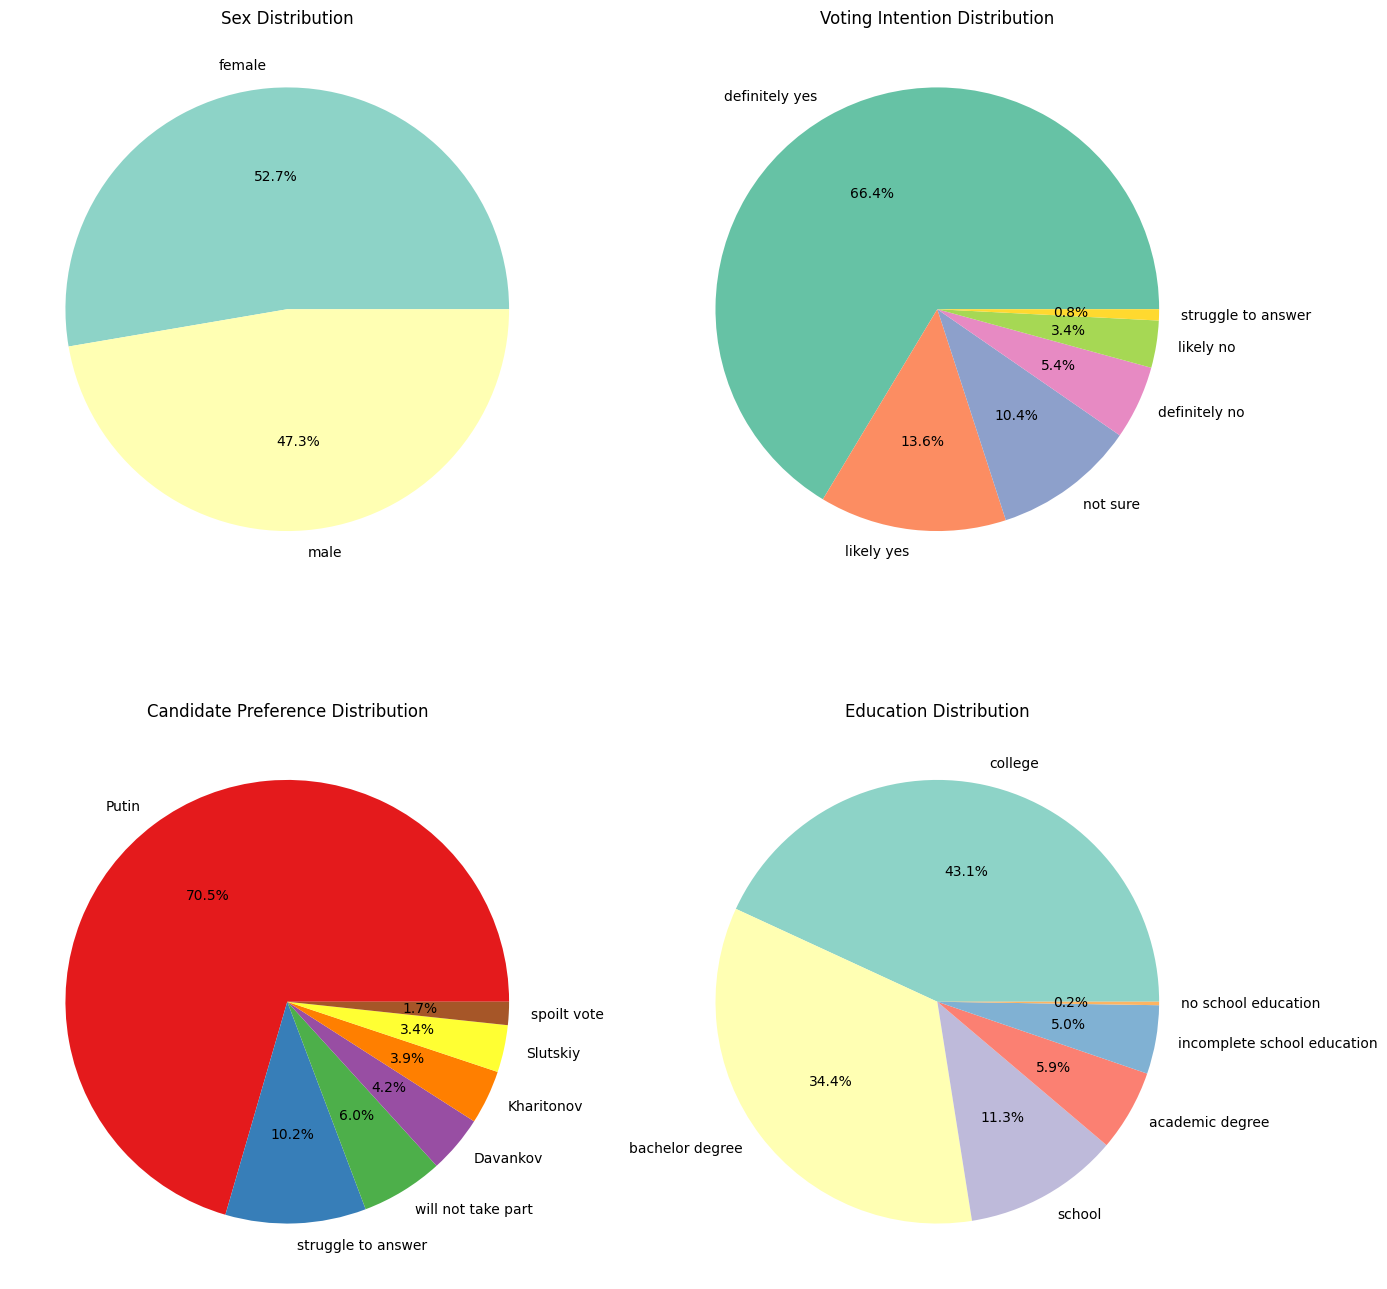

In [14]:
# Set up the matplotlib figure for pie charts
plt.figure(figsize=(14, 14))

# Pie chart for sex distribution
plt.subplot(2, 2, 1)
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Sex Distribution')
plt.ylabel('')  # Hides the y-label

# Pie chart for voting intention
plt.subplot(2, 2, 2)
df['will_vote'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Voting Intention Distribution')
plt.ylabel('')  # Hides the y-label

# Pie chart for candidate preference
plt.subplot(2, 2, 3)
df['candidate'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Candidate Preference Distribution')
plt.ylabel('')  # Hides the y-label

# Pie chart for education distribution
plt.subplot(2, 2, 4)
df['education'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Education Distribution')
plt.ylabel('')  # Hides the y-label

plt.tight_layout()
plt.show()

## Insights

### Sex Distribution: 
The dataset has a nearly balanced distribution of males and females, with a slight majority of males.

### Voting Intention: 
A significant portion of respondents are committed to voting ("definitely yes"), but a notable percentage are still unsure.

### Candidate Preference: 
Putin is the preferred candidate for a majority of respondents, followed by Davankov, with other candidates having smaller shares.

### Education: 
The respondents have diverse educational backgrounds, with many holding college degrees or higher, indicating a relatively educated sample.

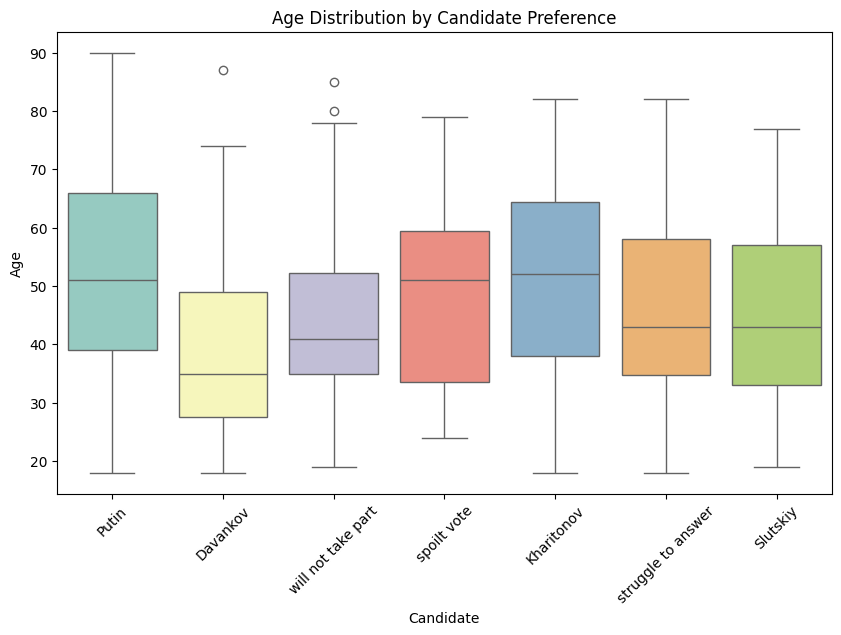

In [15]:
# Analyzing the relationship between age and candidate preference

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Boxplot to show the distribution of age across different candidates
sns.boxplot(x='candidate', y='age', data=df, palette='Set3')

plt.title('Age Distribution by Candidate Preference')
plt.xlabel('Candidate')
plt.ylabel('Age')

plt.xticks(rotation=45)
plt.show()

## Insights:

### Putin: 
Attracts a broad age range, but primarily middle-aged and older voters.

### Davankov: 
Appeals slightly more to younger voters compared to Putin.

### Other Candidates: 
Voters for other candidates show varied age distributions, but insights are less clear due to smaller sample sizes.

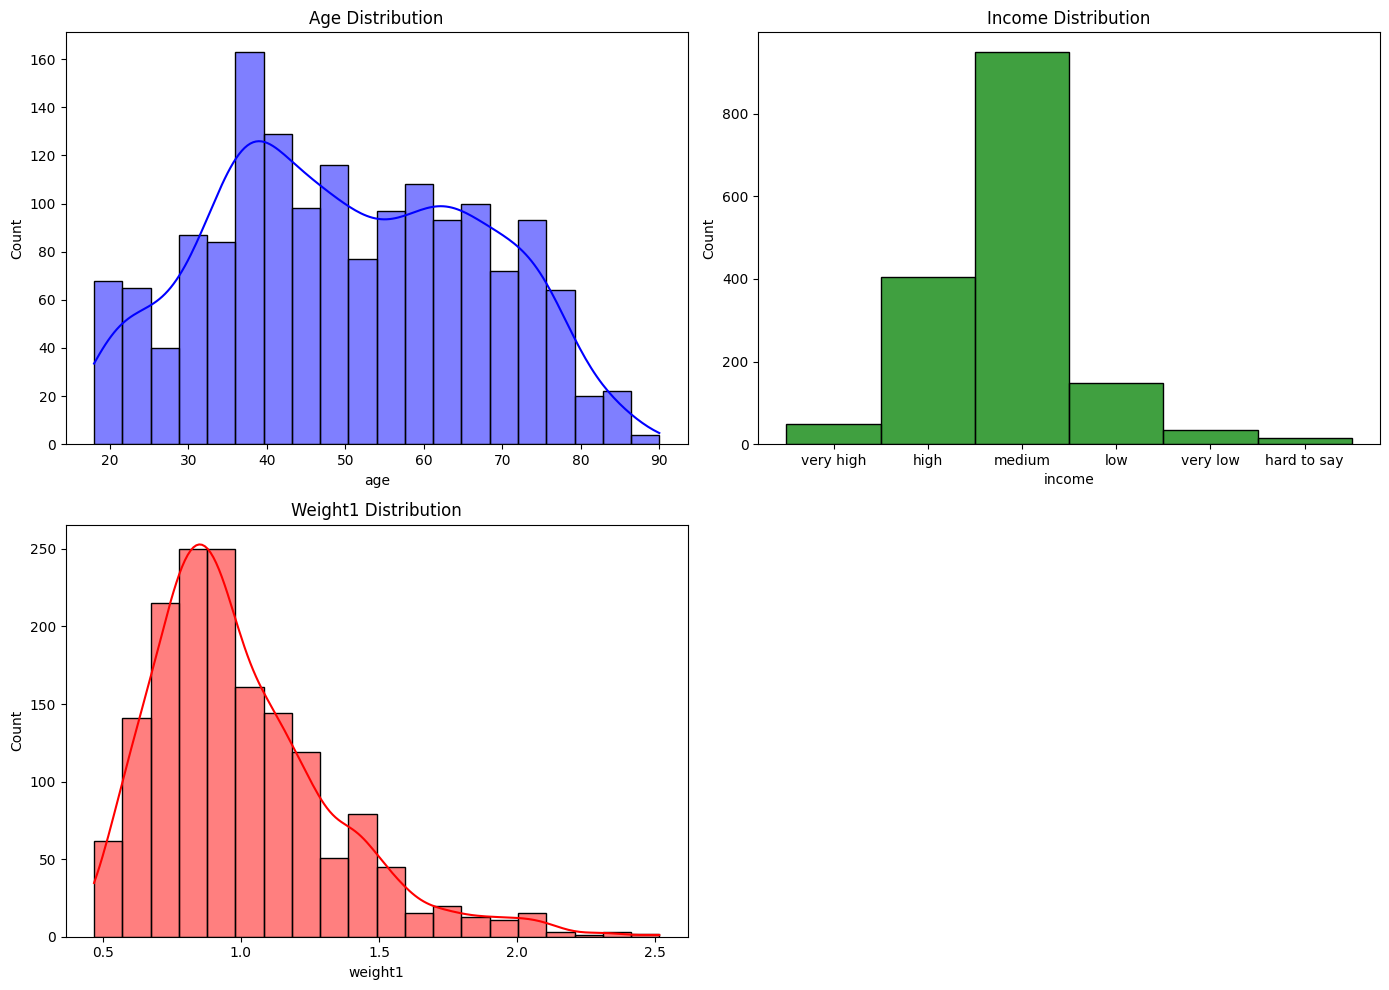

In [16]:
# Set up the matplotlib figure for histograms
plt.figure(figsize=(14, 10))

# Histogram for age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution')

# Histogram for income distribution
plt.subplot(2, 2, 2)
sns.histplot(df['income'], kde=False, color='green')
plt.title('Income Distribution')

# Histogram for weight1 distribution
plt.subplot(2, 2, 3)
sns.histplot(df['weight1'], kde=True, color='red', bins=20)
plt.title('Weight1 Distribution')

plt.tight_layout()
plt.show()

## Insights:

### Age Distribution: 
The respondents are primarily middle-aged, with the majority between 30 and 60 years old.

### Income Distribution: 
The income distribution is heavily skewed towards "very high" income levels, indicating that the sample may consist of predominantly wealthier individuals.

### Weight1 Distribution: 
The weight1 values are centered around 1, with slight variations, suggesting that the dataset is generally balanced but includes some weighting adjustments.